In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
import random

In [6]:
data = pd.read_csv('Life Expectancy Data.csv')

In [7]:
data = data.dropna()

In [8]:
data = shuffle(data)

In [9]:
X = data.drop(data.columns[3], axis=1)
y = data.iloc[:,3]

In [10]:
# Select the categorical columns
categorical = X.select_dtypes(include=['object']).columns.tolist()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Optionally drop the first dummy variable to prevent multicollinearity

# Fit and transform the one-hot encoding on categorical features
one_hot = encoder.fit_transform(X[categorical])

# Ensure one-hot encoding DataFrame has the same index as the original DataFrame
one_hot_X = pd.DataFrame(one_hot, index=X.index, columns=encoder.get_feature_names_out(categorical))

# Concatenate the original DataFrame and the one-hot encoded features
df_encoded = pd.concat([X.drop(categorical, axis=1), one_hot_X], axis=1)

# Assign the processed DataFrame back to X
X = df_encoded
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
1151,2002,169.0,6,3.09,154.863616,94.0,0,4.4,7,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1900,2008,386.0,536,9.30,105.591063,41.0,9960,21.0,848,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1943,2014,162.0,359,0.01,62.293611,72.0,1370,24.7,442,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
471,2008,199.0,16,2.24,53.100090,91.0,4211,15.3,18,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1644,2005,67.0,0,6.41,2247.035692,85.0,6,65.0,0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2003,146.0,24,0.58,88.165062,9.0,10841,47.3,28,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1669,2013,147.0,0,0.01,917.467628,98.0,0,32.3,0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1110,2011,229.0,0,7.56,536.233252,93.0,0,43.2,1,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
293,2010,228.0,1,0.28,244.039195,91.0,21,2.3,1,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
X = X.to_numpy()
y = y.to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(154),
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, verbose=1)

model.fit(tf.expand_dims(X_train,1), y_train, epochs=2500, validation_data=(X_test, y_test))


Epoch 1/2500
42/42 [==============================] - 154s 3s/step - loss: 1396987.6250 - mae: 1396987.6250 - val_loss: 69.0010 - val_mae: 69.0010
Epoch 2/2500
42/42 [==============================] - 151s 4s/step - loss: 69.3201 - mae: 69.3201 - val_loss: 68.9588 - val_mae: 68.9588
Epoch 3/2500
42/42 [==============================] - 212s 5s/step - loss: 69.2779 - mae: 69.2779 - val_loss: 68.9166 - val_mae: 68.9166
Epoch 4/2500
10/42 [======>.......................] - ETA: 3:14 - loss: 69.1193 - mae: 69.1193


KeyboardInterrupt



In [16]:
model.evaluate(tf.expand_dims(X_test, 1), y_test)

11/11 [==============================] - 1s 18ms/step - loss: 6.9564 - mae: 6.9564


[6.956449031829834, 6.956449031829834]

In [21]:
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import *

# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV

In [28]:
# Train the model
lreg = RandomForestRegressor()
lreg.fit(X_train, y_train)

# Prediction on the test dataset
y_pred_1 = lreg.predict(X_test)

In [29]:
# Train the model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Prediction on the test dataset
y_pred_2 = lreg.predict(X_test)



In [30]:
# Train the model
lreg = GradientBoostingRegressor()
lreg.fit(X_train, y_train)

# Prediction on the test dataset
y_pred_3 = lreg.predict(X_test)

In [38]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation of model {model_name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))

In [39]:
evaluate_model(y_test, y_pred_1, "Random Forest")

Evaluation of model Linear Regression
MSE: 2.9031950818181778
MAE: 1.0749969696969688
R² Score: 0.962709815454423


In [41]:
evaluate_model(y_test, y_pred_2, "Linear Regression")

Evaluation of model Linear Regression
MSE: 2.7702738092867887
MAE: 1.1023294121323515
R² Score: 0.9644171271034991


In [40]:
evaluate_model(y_test, y_pred_3, "Gradient Boosting Regression")

Evaluation of model Gradient Boosting Regression
MSE: 4.045018663910267
MAE: 1.4143918015281307
R² Score: 0.9480436249661008


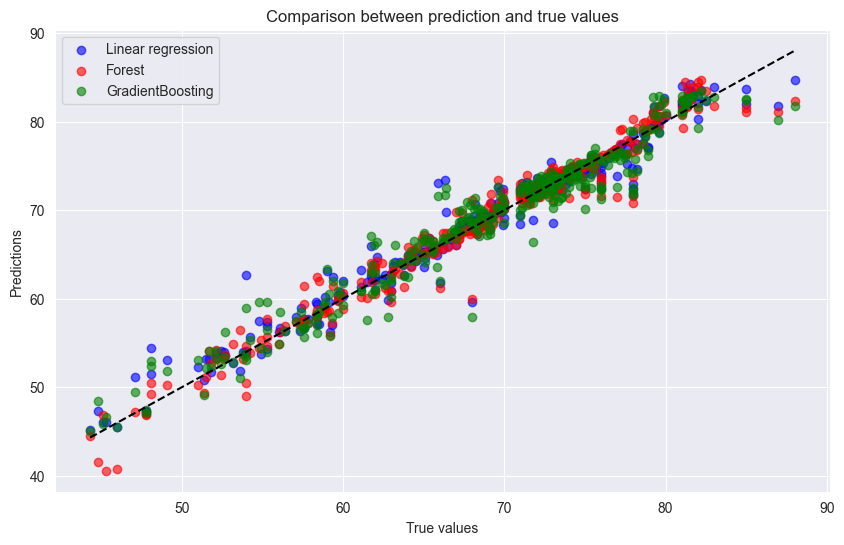

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, color='blue', label='Linear regression', alpha=0.6)
plt.scatter(y_test, y_pred_2, color='red', label='Forest', alpha=0.6)
plt.scatter(y_test, y_pred_3, color='green', label='GradientBoosting', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Comparison between prediction and true values')
plt.legend()
plt.show()